# 4.7.1 일변량통계


In [1]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

CPython 3.7.6
IPython 7.12.0

sklearn 0.0
numpy 1.18.1
scipy 1.4.1
matplotlib 3.1.3


# 0. 라이브러리 import
## 특성선택

## 0.1 > F검증 이용방법
## Ex. SelectKBest(score_func= function f_classif, * , k=10)
### 1-1. SelectPercentile : 비율지정
### 1-2. SelectKBest : 특성개수 지정함
#### 2-1. f_classif(디폴트) : 클래스분류서 F검증__ 클래스별 분산과 전체 분산 이용함
### 2-2. f_regression : 회귀에서 F검증__p값 이용함

***************
참고
f_classif: ANOVA F-value between label/feature for classification tasks.
 
mutual_info_classif: Mutual information for a discrete target.
 
chi2: Chi-squared stats of non-negative features for classification tasks.
 
f_regression: F-value between label/feature for regression tasks.
 
mutual_info_regression: Mutual information for a continuous target.
SelectPercentile: Select features based on percentile of the highest scores.
SelectFpr: Select features based on a false positive rate test.
SelectFdr: Select features based on an estimated false discovery rate.
SelectFwe: Select features based on family-wise error rate.
GenericUnivariateSelect: Univariate feature selector with configurable mode.

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif, SelectKBest
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [26]:
warnings.filterwarnings('ignore')
cancer = load_breast_cancer()

In [11]:
print(cancer.data[:3])
print(cancer.target[:30])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


## 1.고정된 난수 발생__정규분포 ##

In [13]:

#난수는 noise에 들어감
rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 50)) #[행,열]

# 데이터에 노이즈 특성을 추가합니다
##진짜변수랑 노이즈 concat##
# 처음 30개는 원본 특성이고 다음 50개는 노이즈입니다
X_w_noise = np.hstack([cancer.data, noise])


참고, 결국 노이즈 50개 변수가 섞인 총 80개 변수가 특성으로 있고, 정답레이블은 그대로 존재!

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

### 2. f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다

In [22]:
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다
select = SelectPercentile(score_func = f_classif, percentile = 50)
select.fit(X_train, y_train)
#훈련에 적용__transform
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape: (변수들 반만 남음)", X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape: (변수들 반만 남음) (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x1e5556a4148>],
 <a list of 1 Text yticklabel objects>)

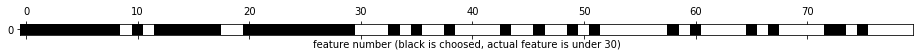

In [30]:
mask = select.get_support() #선택된 변수에 마스크칠 하기 위해
print(mask)
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('feature number (black is choosed, actual feature is under 30)')
plt.yticks([0])

## 3. 로지스틱 회귀로 실제 성능평가해봄
###책에서는 특성추출한것이 더 높게나옴...당연

In [32]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
        lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.919
선택된 일부 특성을 사용한 점수: 0.912


# 4.7.2 모델기반 특성선택
*******
결정트리와 그에서 파생된 방법들은 **특성의 중요도가 담겨있는** feature_importances_ 속성을 제공한다. 
********
    **연속형에 대한 트리도 가능한**듯. 
    a. 목표변수
 또는 CART 모형 같은 경우는 분산을 이용해 이진분리를 진행한다는듯(출처.ADsP책)
  
 (구글링내용. 목표변수가 연속형일 경우 평균과 표준편차에 기초하여 마디의 분리가 일어난다.))
  
     b. 독립변수
 이때는...**독립변수의  분리규칙이 A= Xj <= S로 된다. **
 
  (ex. 소득 100달러 이상,이하도 분리)
 *************
##### 이를 **다른 모델 특성선택을 위한 전처리로 사용가능**
### ==> feature_selection.SelectFromModel 에 구현되있음
 
또는 **선형모델 '계수의 절대값'**도 특성의 중요도에 사용가능

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier #붓스트랩 추출 + 결정트리
select = SelectFromModel(
                RandomForestClassifier(n_estimators=100, random_state = 42),
                threshold = 'median')

In [35]:
select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([<matplotlib.axis.YTick at 0x1e556267488>],
 <a list of 1 Text yticklabel objects>)

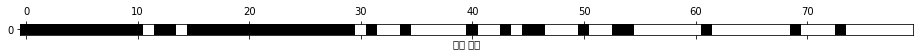

In [36]:
mask = select.get_support()
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [37]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.930


## ==>점수 확실히 올라간것 확인할 수 있음

# 4.7.3 반복적 특성선택
## ** 주요모델 RFE(재귀적특성제거법)
RFE (recursive feature elimination)

: 모든 특성으로 시작해서 모델을 만들고 특성중요도가 가장 낮은 특성을 제거
 
: 제거한 특성을 빼고 나머지 특성 전체로 새로운 모델 만들고 
 
: 미리 정의한 특성 개수가 남을때까지 반복함

: 단점은, 모델 계속 돌려보니 시간이 오래걸림

**********************
* 회귀모델의 전진,후진,단계 선택법은 제공하지 않는다.
그러나, 회귀모델의 score함수에서 R^2값으로 쉽게 구현 가능함

([<matplotlib.axis.YTick at 0x1e5562ec488>],
 <a list of 1 Text yticklabel objects>)

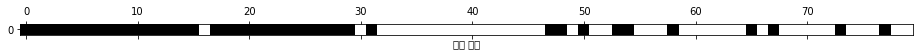

In [38]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# 선택된 특성을 표시합니다
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [41]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

#특성된 변수들로 로지스틱 회귀로 돌림
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.930


### cf. REF에 사용된 모델로 바로 예측도 가능하다..

In [40]:
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

테스트 점수: 0.951


# 4.8 전문가지식 활용 : 도메인 전문가가 내재된 특성같은것 넣어야 된다 임

# 4.9. 변수선택법, 다중공선성 (구글링)
## statsmodel 사용

In [43]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 데이터 불러오기

corolla = pd.read_csv("./ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [44]:
# 데이터 수와 변수의 수 확인하기

nCar = corolla.shape[0]
nVar = corolla.shape[1]

print(nCar,nVar)                       # 1436-row , 37-col

corolla.info()

1436 37
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Gu

In [45]:
##범주형을 이진형으로 바꿔줌
# 가변수 생성

dummy_p = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)

dummy_p

# boolean 인덱싱을 통해 boolean index 행렬 생성

p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

# boolean index 행렬을 사용하여 가변수에 대입 ( True = 1, False = 0 )

dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

dummy_p

array([0, 0, 0, ..., 1, 1, 1])

In [46]:
# 행렬로 존재하는 가변수 -> 데이터프레임으로 전환

Fuel = pd.DataFrame({"Petrol" : dummy_p, "Diesel" : dummy_d, "CNG" : dummy_c})
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [49]:
# 불필요한 변수 삭제 및 가변수 붙이기

corolla_ = corolla.drop(["Id","Model","Fuel_Type"],axis = 1, inplace = False)
mlr_data = pd.concat((corolla_,Fuel),1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [51]:
# bias를 위한 상수항 추가

mlr_data = sm.add_constant(mlr_data, has_constant = "add")
mlr_data

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.0,7500,69,12,1998,20544,86,1,0,1300,...,0,1,1,1,0,0,0,1,0,0
1432,1.0,10845,72,9,1998,19000,86,0,0,1300,...,0,0,1,1,0,0,0,1,0,0
1433,1.0,8500,71,10,1998,17016,86,0,0,1300,...,0,0,0,1,0,0,0,1,0,0
1434,1.0,7250,70,11,1998,16916,86,1,0,1300,...,0,0,0,1,0,0,0,1,0,0


In [52]:
feature_columns = mlr_data.columns.difference(["Price"]) # Target column 빼기

X = mlr_data[feature_columns]
y = mlr_data.Price

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [53]:
# train & 회귀모델 적합

full_model = sm.OLS(train_y,train_x) #ordinary least square #최소자승법???
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     332.4
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:28:34   Log-Likelihood:                -8440.0
No. Observations:                1005   AIC:                         1.695e+04
Df Residuals:                     971   BIC:                         1.712e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -293.5902    133.313     -2.202      0.028    -555.205     -31.976
Age_08_04         -113.5885      4.040    -28.118      0.000    -121.516    -105.661
Airbag_1           -72.0547    244.932     -0.294      0.769    -552.712     408.603
Airbag_2           -26.4928    134.395     -0.197      0.844    -290.231     237.246
Airco              346.7986     94.238      3.680      0.000     161.864     531.733
Automatic          510.6463    156.992      3.253      0.001     202.563     818.729
Automatic_airco   2184.0320    191.917     11.380      0.000    1807.413    2560.651
BOVAG_Guarantee    471.9819    129.768      3.637      0.000     217.324     726.640
Backseat_Divider  -172.2912    133.404     -1.291      0.197    -434.085      89.503
Boardcomputer     -257.6579    123.907     -2.079      0.038    -500.815     -14.501
CD_Player          213.2001    105.088      2.029      0.043       6.974     419.426
CNG              -2013.2074    251.371     -8.009      0.000   -2506.500   -1519.915
Central_Lock      -122.1724    144.740     -0.844      0.399    -406.211     161.867
Cylinders           -0.0272      0.002    -11.355      0.000      -0.032      -0.022
Diesel            2072.8916    295.393      7.017      0.000    1493.208    2652.575
Doors               58.4743     41.509      1.409      0.159     -22.984     139.932
Gears              -95.6974    212.704     -0.450      0.653    -513.110     321.716
Guarantee_Period    72.3509     13.713      5.276      0.000      45.439      99.262
HP                  60.1035      5.476     10.976      0.000      49.358      70.849
KM                  -0.0167      0.001    -12.412      0.000      -0.019      -0.014
Met_Color           27.9054     79.880      0.349      0.727    -128.852     184.662
Metallic_Rim       158.1318     98.807      1.600      0.110     -35.768     352.031
Mfg_Month          -92.6698     10.723     -8.642      0.000    -113.712     -71.627
Mfg_Year             3.5808      0.888      4.032      0.000       1.838       5.324
Mfr_Guarantee      294.9150     76.193      3.871      0.000     145.393     444.437
Mistlamps           -7.4332    112.690     -0.066      0.947    -228.578     213.712
Petrol             -59.6910    235.626     -0.253      0.800    -522.085     402.703
Power_Steering     -24.9419    281.314     -0.089      0.929    -576.995     527.112
Powered_Windows    467.3523    144.383      3.237      0.001     184.014     750.690
Quarterly_Tax       14.1576      1.877      7.545      0.000      10.475      17.840
Radio             -436.2772    798.713     -0.546      0.585   -2003.681    1131.126
Radio_cassette     443.2407    801.618      0.553      0.580   -1129.862    2016.343
Sport_Model        364.4395     92.422      3.943      0.000     183.070     545.809
Tow_Bar           -153.

# R^2 그래도 90퍼 정도 나왔음 위에...




************************


# *********** **여기가 중요** ******************

# 2. 다중공선성 확인
## * **분산팽창계수(VIF)** : 10보다 크면 심각한 문제

In [58]:
# VIF를 통한 다중공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif.sort_values("VIF Factor",ascending= False)  

,VIF Factor,features
37,inf,CNG
36,inf,Diesel
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
35,inf,Petrol
28,62.344621,Radio
33,62.172860,Radio_cassette
1,10.953474,Price
13,5.496805,Quarterly_Tax


 위의 OLS와 VIF 검정을 모두 확인했을 때, P-value가 유의하고 VIF값이 매우 높아도 논리적으로 중요한 변수라고 생각하면 변수를 지우지 않고 살릴 필요가 있다. 
 
### **이러한 과정을 통해 중요하지 않은 변수 중에서, P-value가 높고 VIF값이 높은 변수를 선택해서 제거해야한다.**

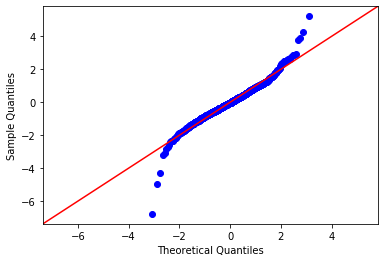

In [59]:
# 학습데이터의 잔차 확인

res = fitted_full_model.resid

# q-q plot을 통한 잔차의 정규분포 확인
fig = sm.qqplot(res,fit = True,line = '45')

 q-q plot은 잔차의 정규성을 확인할 때 쓰는 그래프 중 하나로, statsmodels.api 라이브러리 내에 존재한다. 이 q-q plot은 y=x의 형태를 띄어야 정규성을 보이는 것이다. 위의 그래프를 보면 잔차가 완전한 정규성을 보이지 않는 것을 확인할 수 있다. 하지만, 실제데이터는 잔차가 완전한 정규성을 띄는 것을 확인하기 힘들다. 보통 위의 그래프처럼 실제에서도 꼬리부분의 값을이 정규성을 띄지 않는 경우가 많다. 그래도 위의 그래프는 꼬리부분 약간의 데이터를 제외하고 정규성을 띄고 있다고 판단되어 양호하다는 판단이 가능하다.
 

# 0. 변수선택법 (전체 경우의 수를 찾는 방법)

In [61]:
# 변수선택을 통해 형성한 모델의 AIC를 구하는 함수
# AIC가 낮을 수록 모델이 좋다고 평가된다.

def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic                   # model's AIC
    return {"model" : regr, "AIC" : AIC}
    
print(processSubset(X = train_x, y = train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E5562C0C48>, 'AIC': 19187.60931446556}


AIC(Akaike Information Criterion), BIC(Bayes Information Criterion)



AIC = -2log(likelihood) + 2p

BIC = -2log(likelihood) + plog(n)

p: 변수의 갯수, n: 데이터 갯수



**선형 회귀의 경우 **

 AIC는 nlog(RSS/n) + 2p, 
  
BIC는 nlog(RSS/n) +plog(n)이다.

(상기 log는 자연로그이다.) 



**변수가 많은 모델이라면(p가 큰) RSS는 작아지게 된다. 결국 AIC, BIC를 최소화 한다는 뜻은 우도(likelihood)를 가장 크게 하는 동시에 변수 갯수는 가장 적은 최적의 모델(parsimonious & explainable)을 의미**하게 된다. **Bias는 변수를 제거하면서 생기는 오류이고 Variance는 변수가 증가하면서 생기는 오류이다. 상기 AIC와 BIC 식의 좌변을 bias, 우변을 variation으로 부르는 이유이기도 하다.** 아래 그림의 변수 갯수에 따른 bias와 variance 관계는 최적 모델 선택을 위한 균형점을 제시한다.

In [62]:
# 전체 변수의 AIC test

processSubset(X=train_x, y=train_y, feature_set = feature_columns) 

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1e5562cf248>,
 'AIC': 16948.040280795576}

## 모든 가능한 조합방법(비추)

In [76]:
import time
import itertools 

# getBest : 가장 낮은 AIC를 가지는 모델을 선택하고 저장하는 함수
def getBest(X,y,k):
    tic = time.time()      # 시작 시간
    results = []           # 결과 저장 공간
    # 각 변수 조합을 고려한 경우의수
    for combo in itertools.combinations(X.columns.difference(['const']),k):
        combo = (list(combo)+['const'])
        # 상수항을 추가하여 combo를 결성
        results.append(processSubset(X,y,feature_set = combo)) # 모델링된것을 저장
        # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
        # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함
    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time()       # 종료 시간
    print("Processed", models.shape[0], "models on", k,
          "predictors in",(toc - tic),"seconds.")
    return best_model

In [78]:
print(getBest(X=train_x, y = train_y, k=2))
model_best = getBest(X=train_x, y = train_y, k=2)


Processed 630 models on 2 predictors in 2.0096611976623535 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17627.2
Name: 211, dtype: object
Processed 630 models on 2 predictors in 2.125431776046753 seconds.


model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17627.2
Name: 211, dtype: object

In [80]:
# 변수 선택에 따른 학습시간과 저장

models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,4):
	models.loc[i] = getBest(X=train_x, y=train_y,k=i)
toc = time.time()
print("Total elapsed time:",(toc-tic),"seconds.")

Processed 36 models on 1 predictors in 0.15358853340148926 seconds.
Processed 630 models on 2 predictors in 2.165268659591675 seconds.
Processed 7140 models on 3 predictors in 25.517121076583862 seconds.
Total elapsed time: 28.175397634506226 seconds.


In [ ]:
# 선택된 변수의 개수(1,2,3)별 가장낮은 AIC를 보유한 모델들이 들어있는 DF

models

In [82]:
# 가장 AIC가 낮은 3번째 모델의 OLS결과를 출력

models.loc[3,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2058.
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:00:58   Log-Likelihood:                -8711.2
No. Observations:                1005   AIC:                         1.743e+04
Df Residuals:                    1001   BIC:                         1.745e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0250      0.001    -17.387      0.000      -0.028      -0.022
Mfg_Year    1465.0897     38.802     37.758      0.000    1388.947    1541.233
Weight        19.4494      0.933     20.845      0.000      17.619      21.280
const      -2.938e+06   7.71e+04    -38.101      0.000   -3.09e+06   -2.79e+06
==============================================================================
Omnibus:                      215.555   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2233.177
Skew:                          -0.664   Prob(JB):                         0.00
Kurtosis:                      10.181   Cond. No.                     1.35e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3. 단계적선택법

In [87]:
### 전진석택법(step=1)

def forward(X,y,predictors):
	
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
    	results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model

In [100]:
def forward_model(X,y):### 전진선택법 모델

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1 :
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])

In [101]:
Forward_best_model = forward_model(X=train_x, y=train_y)

Processed  36 models on 1 predictors in 0.051862239837646484
Selected predictors: ['Mfg_Year', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E560B635C8>
Processed  35 models on 2 predictors in 0.06682109832763672
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E560B70908>
Processed  34 models on 3 predictors in 0.06879711151123047
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E560B1D248>
Processed  33 models on 4 predictors in 0.0917978286743164
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E560B362C8>
Processed  32 models on 5 predictors in 0.09674215316772461
Selected predictors: ['Mfg_Year', 'Automatic_airco', 

Processed  11 models on 26 predictors in 0.07878756523132324
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'cc', 'CNG', 'Guarantee_Period', 'BOVAG_Guarantee', 'Diesel', 'Mfr_Guarantee', 'Airco', 'Sport_Model', 'ABS', 'Automatic', 'Boardcomputer', 'Mfg_Month', 'CD_Player', 'Tow_Bar', 'Backseat_Divider', 'Metallic_Rim', 'Doors', 'Petrol', 'Cylinders', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E572091088>
Total elapsed time: 3.2335710525512695 seconds.


In [102]:
Forward_best_model.aic

16931.763821482367

In [103]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     460.4
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:08:10   Log-Likelihood:                -8440.9
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     980   BIC:                         1.705e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1367.8299     46.988     29.110      0.000    1275.621    1460.039
Automatic_airco   2177.7302    180.042     12.096      0.000    1824.418    2531.042
Weight               9.9073      1.198      8.270      0.000       7.556      12.258
KM                  -0.0168      0.001    -12.546      0.000      -0.019      -0.014
HP                  59.6143      5.284     11.282      0.000      49.245      69.983
Powered_Windows    368.5500     86.404      4.265      0.000     198.992     538.108
Quarterly_Tax       14.0764      1.828      7.699      0.000      10.488      17.664
cc                  -4.5757      0.525     -8.717      0.000      -5.606      -3.546
CNG              -6.859e+05   2.34e+04    -29.257      0.000   -7.32e+05    -6.4e+05
Guarantee_Period    71.8823     13.447      5.346      0.000      45.494      98.270
BOVAG_Guarantee    465.9749    127.204      3.663      0.000     216.351     715.599
Diesel           -6.818e+05   2.35e+04    -29.064      0.000   -7.28e+05   -6.36e+05
Mfr_Guarantee      295.8505     74.788      3.956      0.000     149.088     442.613
Airco              328.5708     90.806      3.618      0.000     150.375     506.767
Sport_Model        357.6376     88.470      4.042      0.000     184.025     531.250
ABS               -322.4456    101.816     -3.167      0.002    -522.248    -122.643
Automatic          506.7483    155.681      3.255      0.001     201.243     812.254
Boardcomputer     -256.8242    121.831     -2.108      0.035    -495.904     -17.745
Mfg_Month           22.0935     10.478      2.108      0.035       1.531      42.656
CD_Player          215.9592    100.568      2.147      0.032      18.606     413.312
Tow_Bar           -148.9504     81.033     -1.838      0.066    -307.968      10.067
Backseat_Divider  -186.9990    120.277     -1.555      0.120    -423.029      49.031
Metallic_Rim       144.7996     92.804      1.560      0.119     -37.318     326.917
Doors               58.8450     40.601      1.449      0.148     -20.829     138.519
Petrol           -6.839e+05   2.34e+04    -29.211      0.000    -7.3e+05   -6.38e+05
const            -2.052e+06   7.03e+04    -29.179      0.000   -2.19e+06   -1.91e+06
==============================================================================
Omnibus:                      101.333   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              690.905
Skew:                          -0.100   Prob(JB):                    9.37e-151
Kurtosis:                       7.057   Cond. No.                     1.14e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.64e-20. 

In [91]:
### 후진소거법(step=1)

def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리 정의된 predictors 조합 확인
    
    for combo in itertools.combinations(predictors, len(predictors) - 1):
    	results.append(processSubset(X=X,y=y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print("Processed ",models.shape[0], "models on", len(predictors) - 1, "predictors in",(toc-tic))
    print("Selected predictors:",best_model['model'].model.exog_names,' AIC:',best_model[0])
    return best_model
    

In [105]:
def backward_model(X,y) :
    Bmodels = pd.DataFrame(columns=["AIC","model"],
                           index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors=predictors)
        if Backward_result['AIC'] > Bmodel_before :
            break
        Bmodels.loc[len(predictors) -1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Bmodels["model"].dropna().iloc[0])
    

In [106]:
Backward_best_model = backward_model(X=train_x, y= train_y)

Processed  36 models on 35 predictors in 0.19994425773620605
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E561856E48>
Processed  35 models on 34 predictors in 0.2403557300567627
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_R

In [109]:
print(Backward_best_model.aic)
Backward_best_model.summary()

16931.763821482396


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     460.4
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:11:40   Log-Likelihood:                -8440.9
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     980   BIC:                         1.705e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -322.4456    101.816     -3.167      0.002    -522.248    -122.643
Airco              328.5708     90.806      3.618      0.000     150.375     506.767
Automatic          506.7483    155.681      3.255      0.001     201.243     812.254
Automatic_airco   2177.7302    180.042     12.096      0.000    1824.418    2531.042
BOVAG_Guarantee    465.9749    127.204      3.663      0.000     216.351     715.599
Backseat_Divider  -186.9990    120.277     -1.555      0.120    -423.029      49.031
Boardcomputer     -256.8242    121.831     -2.108      0.035    -495.904     -17.745
CD_Player          215.9592    100.568      2.147      0.032      18.606     413.312
CNG              -1935.2888    382.976     -5.053      0.000   -2686.837   -1183.741
Cylinders        -6.437e+05   2.21e+04    -29.187      0.000   -6.87e+05      -6e+05
Diesel            2115.8892    462.396      4.576      0.000    1208.489    3023.289
Doors               58.8450     40.601      1.449      0.148     -20.829     138.519
Guarantee_Period    71.8823     13.447      5.346      0.000      45.494      98.270
HP                  59.6143      5.284     11.282      0.000      49.245      69.983
KM                  -0.0168      0.001    -12.546      0.000      -0.019      -0.014
Metallic_Rim       144.7996     92.804      1.560      0.119     -37.318     326.917
Mfg_Month           22.0935     10.478      2.108      0.035       1.531      42.656
Mfg_Year          1367.8299     46.988     29.110      0.000    1275.621    1460.039
Mfr_Guarantee      295.8505     74.788      3.956      0.000     149.088     442.613
Powered_Windows    368.5500     86.404      4.265      0.000     198.992     538.108
Quarterly_Tax       14.0764      1.828      7.699      0.000      10.488      17.664
Sport_Model        357.6376     88.470      4.042      0.000     184.025     531.250
Tow_Bar           -148.9504     81.033     -1.838      0.066    -307.968      10.067
Weight               9.9073      1.198      8.270      0.000       7.556      12.258
cc                  -4.5757      0.525     -8.717      0.000      -5.606      -3.546
const            -1.609e+05   5513.285    -29.187      0.000   -1.72e+05    -1.5e+05
==============================================================================
Omnibus:                      101.333   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              690.905
Skew:                          -0.100   Prob(JB):                    9.37e-151
Kurtosis:                       7.057   Cond. No.                     1.35e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.33e-20. 

In [115]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns = ["AIC","model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors + ['const'])['AIC']
    
    # 변수 1~10개 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1) :
        Forward_result = forward(X=X,y=y,predictors = predictors) # constant added
        print('forward')
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != "const"]
        Backward_result = backward(X=X,y=y,predictors = predictors)
        if Backward_result["AIC"] < Forward_result["AIC"]:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [k for k in predictors if k != "const"]
            print('backward')
        if Stepmodels.loc[i]["AIC"] > Smodel_before:
            break
        else :
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Stepmodels["model"][len(Stepmodels["model"])])

## 단계적 에러뜨는데 원인 몰겠음ㅜㅜ
https://todayisbetterthanyesterday.tistory.com/10


In [116]:
Stepwise_best_model = Stepwise_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.11272382736206055
Selected predictors: ['Mfg_Year', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001E560A56888>
forward


KeyError: 1